In [1]:
import numpy as np
import astropy
import astroquery
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from astropy.table import Table
import collections

In [2]:
import os
all_files = os.listdir("/common/home/milky-way/")
fits_files = filter(lambda x: x[-5:] == ".fits", all_files)
file = []
for i in fits_files :
    file.append(i)

In [3]:
len(file) # 1 file is empty (196 tiles + 1 empty file)

197

In [ ]:
all_df = dict()
count = 0
for f in file :
    try : # use try and except to ignore 1 empty file
        f2 = "/common/home/milky-way/" + f
        t = Table.read(f2)
        df = t.to_pandas()
        df = df[["SOURCEID", "RA2000", "DEC2000", "L", "B", "J", "K"]]
        tile = str(df["SOURCEID"][0])[:3]
        item_dict = dict()
        item_dict["count"] = len(df)
        item_dict["minJ"] = df["J"].min()
        item_dict["maxJ"] = df["J"].max()
        item_dict["meanJ"] = df["J"].mean()
        item_dict["minK"] = df["K"].min()
        item_dict["maxK"] = df["K"].max()
        item_dict["meanK"] = df["K"].mean()
        all_df[tile] = item_dict
        count = count + 1
        print(count)
    except :
        print("bad file: ", f)
        pass

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
bad file:  ADP.2019-08-16T12:04:46.802.fits


117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190


In [5]:
len(all_df)

196

In [5]:
all_df

{'310': {'count': 4103044,
  'minJ': 8.25773955904045,
  'maxJ': 26.163007683941398,
  'meanJ': 18.152128803482807,
  'minK': 7.2671552188648,
  'maxK': 23.4683393665158,
  'meanK': 16.79873985303045},
 '235': {'count': 2501685,
  'minJ': 8.2439316631335,
  'maxJ': 26.288,
  'meanJ': 18.158985917865493,
  'minK': 7.406000000000001,
  'maxK': 22.8239468212715,
  'meanK': 17.55313812163312},
 '264': {'count': 3234889,
  'minJ': 8.472999999999999,
  'maxJ': 25.827300319488803,
  'meanJ': 17.494299701192865,
  'minK': 7.553999999999999,
  'maxK': 23.597139882034,
  'meanK': 16.95877837110899},
 '275': {'count': 4206454,
  'minJ': 8.1067093908629,
  'maxJ': 26.252278688524605,
  'meanJ': 17.569259747048758,
  'minK': 7.16299628856485,
  'maxK': 23.5265,
  'meanK': 16.923447150147105},
 '372': {'count': 3311537,
  'minJ': 7.747999999999999,
  'maxJ': 25.967,
  'meanJ': 17.855217552653624,
  'minK': 6.914778361045151,
  'maxK': 23.28,
  'meanK': 16.759330713822255},
 '226': {'count': 2234908,

In [6]:
all_df_sorted = collections.OrderedDict(sorted(all_df.items())) # sort dictionary

In [7]:
all_df_sorted

OrderedDict([('201',
              {'count': 1399123,
               'minJ': 8.241509037159599,
               'maxJ': 25.666251724137897,
               'meanJ': 18.878957149428278,
               'minK': 7.548531627788201,
               'maxK': 23.245906782576498,
               'meanK': 18.086024740790453}),
             ('202',
              {'count': 1382993,
               'minJ': 8.493716054158599,
               'maxJ': 26.2436881655988,
               'meanJ': 18.76179144374661,
               'minK': 7.806957654999599,
               'maxK': 23.0853995841996,
               'meanK': 18.02434435337035}),
             ('203',
              {'count': 1574440,
               'minJ': 8.3787001827227,
               'maxJ': 26.2295526852439,
               'meanJ': 18.820992831535595,
               'minK': 7.4061401310467,
               'maxK': 23.7171062046751,
               'meanK': 18.08953055100446}),
             ('204',
              {'count': 1635620,
               'min

In [8]:
import pickle

with open("dict.txt", "wb") as handle : # write dictionary into text file
  pickle.dump(all_df_sorted, handle)

with open("dict.txt", "rb") as handle : # read text file to dictionary
  df = pickle.loads(handle.read())

print(all_df_sorted == df) # True

True


In [9]:
len(df)

196

In [10]:
df

OrderedDict([('201',
              {'count': 1399123,
               'minJ': 8.241509037159599,
               'maxJ': 25.666251724137897,
               'meanJ': 18.878957149428278,
               'minK': 7.548531627788201,
               'maxK': 23.245906782576498,
               'meanK': 18.086024740790453}),
             ('202',
              {'count': 1382993,
               'minJ': 8.493716054158599,
               'maxJ': 26.2436881655988,
               'meanJ': 18.76179144374661,
               'minK': 7.806957654999599,
               'maxK': 23.0853995841996,
               'meanK': 18.02434435337035}),
             ('203',
              {'count': 1574440,
               'minJ': 8.3787001827227,
               'maxJ': 26.2295526852439,
               'meanJ': 18.820992831535595,
               'minK': 7.4061401310467,
               'maxK': 23.7171062046751,
               'meanK': 18.08953055100446}),
             ('204',
              {'count': 1635620,
               'min

In [11]:
n_stars = []
for i in df :
    n_stars.append(df[i]["count"])

In [12]:
tile_list = list(df.keys())

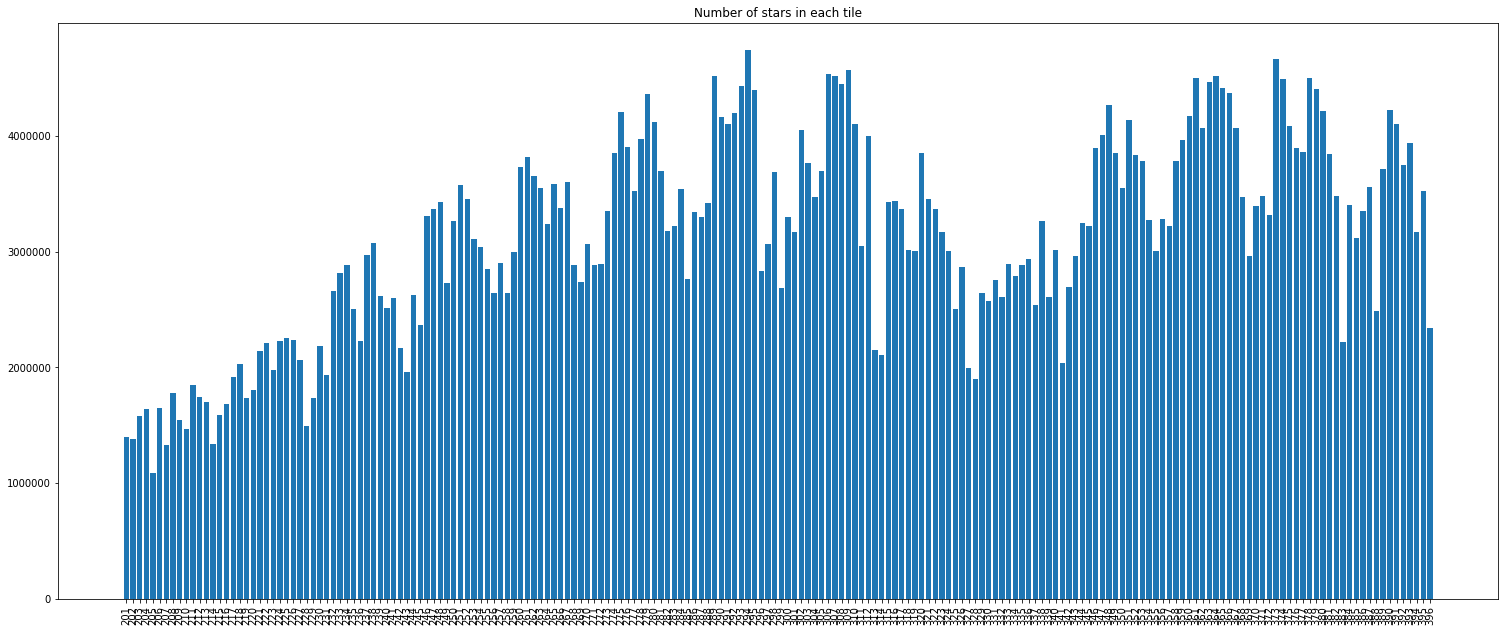

In [13]:
fig = plt.figure(figsize = (20, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(tile_list, n_stars)
ax.set_title("Number of stars in each tile")
plt.xticks(rotation = 90)
plt.show()

In [14]:
def tile_heatmap(df, col) :
    l = [i for i in range(201, 215)]
    df2 = pd.DataFrame() 
    for i in l :
        n = i
        minJ = []
        while n <= 396 :
            minJ.append(df[str(n)][col])
            n = n + 14
        df2[i] = minJ
    plt.figure(figsize = (15, 8))
    ax = sns.heatmap(df2)
    n = 201
    for y in range(df2.shape[0]) :
        for x in range(df2.shape[1]) :
            ax.text(x + 0.5, y + 0.5, n, horizontalalignment = "center", verticalalignment = "center", color = "w")
            n = n + 1
    ax.invert_yaxis()
    ax.invert_xaxis()
    plt.axis("off")
    plt.show()
    

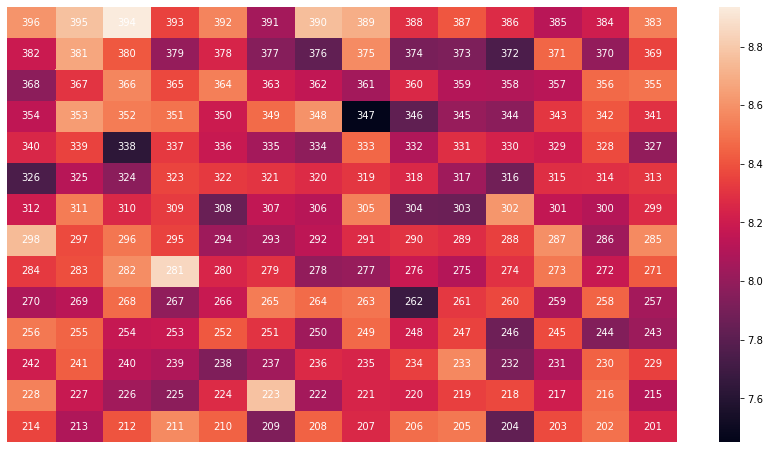

In [15]:
tile_heatmap(df, "minJ") 

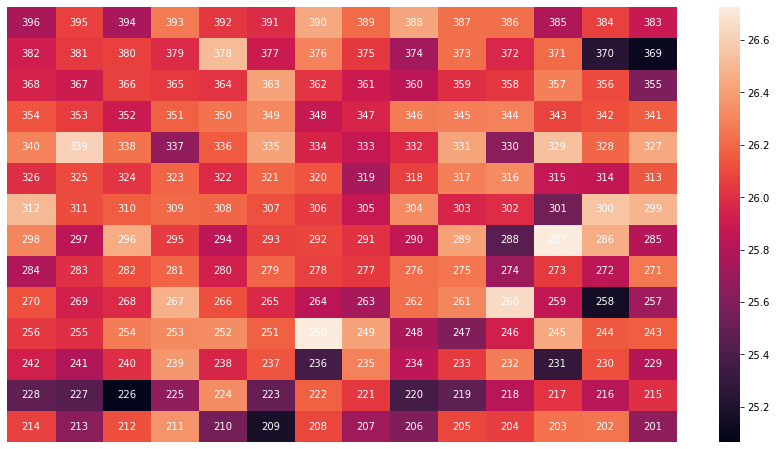

In [16]:
tile_heatmap(df, "maxJ") 

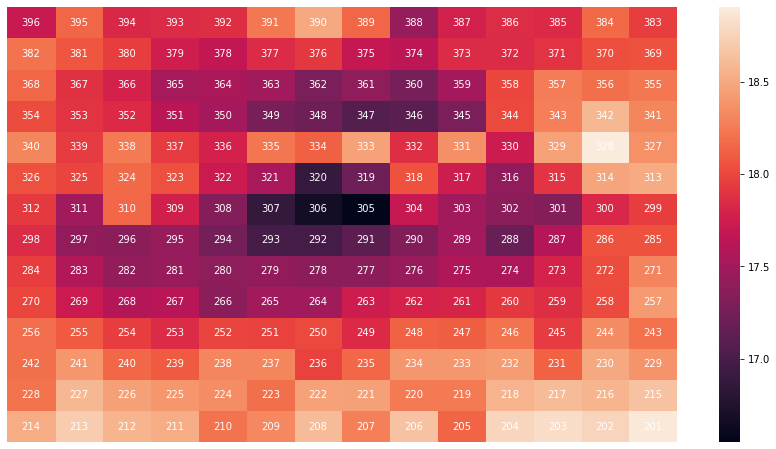

In [17]:
tile_heatmap(df, "meanJ") 

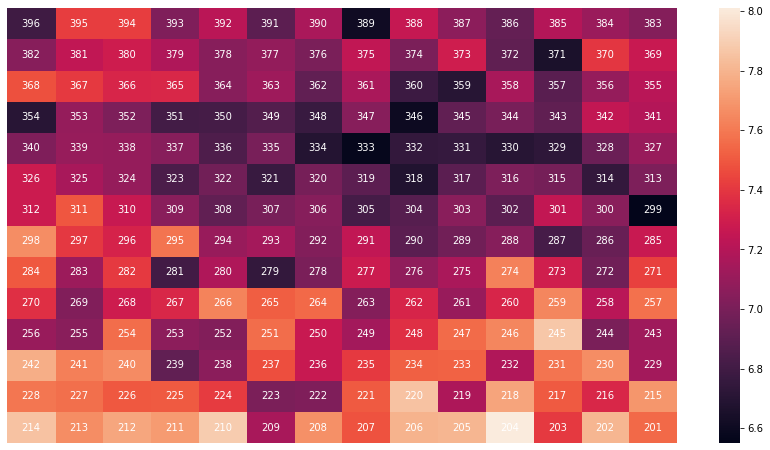

In [18]:
tile_heatmap(df, "minK") 

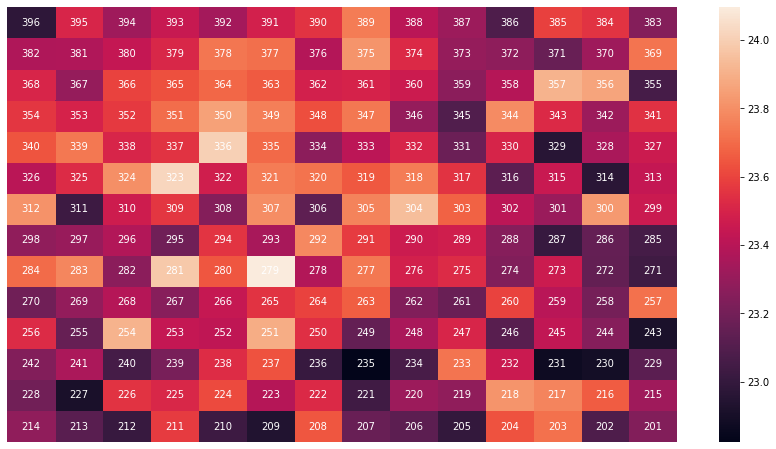

In [19]:
tile_heatmap(df, "maxK") 

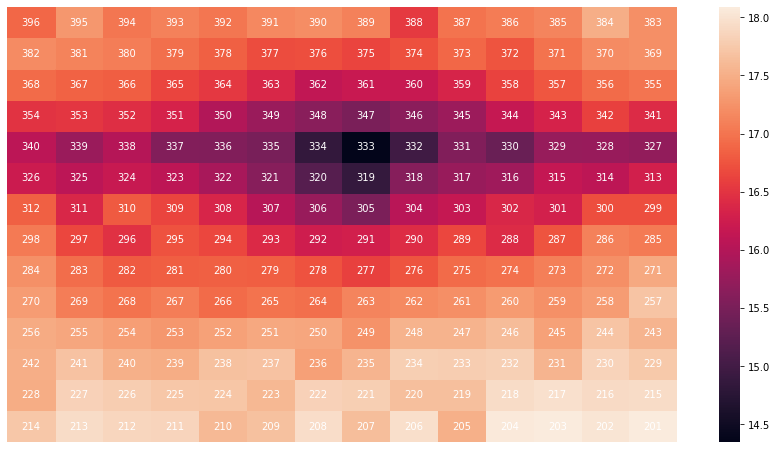

In [20]:
tile_heatmap(df, "meanK") 

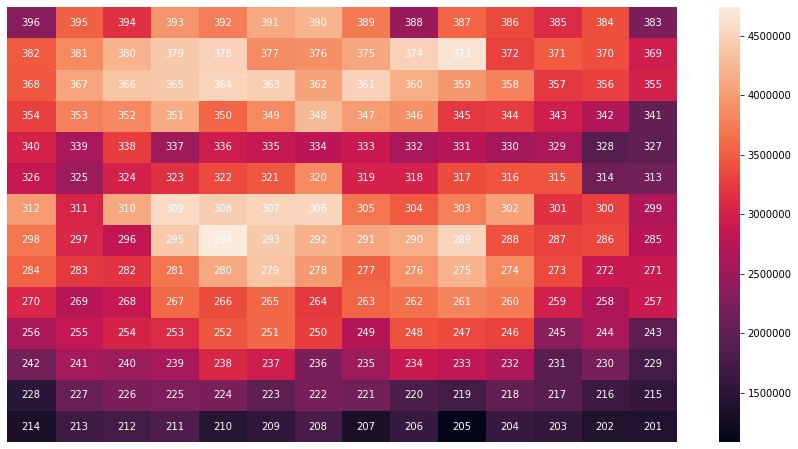

In [21]:
tile_heatmap(df, "count") 

In [ ]:
# Our data set observatory file
# https://archive.eso.org/scienceportal/home?data_release_date=*:2020-12-11&dp_type=CATALOG&ins_id=VIRCAM&prog_id.keyword=179.B-2002&publ_date=2019&p3_user.keyword=%22VALENTI%2c%20E.%22&data_collection=MW-BULGE-PSFPHOT&filter=Ks&fovcorners=355.959405,-38.497171,180.186173,-38.596222,213.423325,16.552740,322.703076,16.634011&sort=prog_id.keyword,-obs_date&s=P%2fDSS2%2fcolor&f=102.808683&fc=322.703076,16.634011&cs=J2000&av=true&ac=false&c=5,6,7,8,9,11,14,16,18&ta=RES&dts=true&at=267.9860163534339,-30.151731234552294&sr=i

# if RA and D are in degrees, the distance formula
# https://phys.libretexts.org/Bookshelves/Astronomy__Cosmology/Supplemental_Modules_(Astronomy_and_Cosmology)/Cosmology/Astrophysics_(Richmond)/01%3A_A_Review_of_Coordinates
# same as
# http://spiff.rit.edu/classes/phys373/lectures/astrom/astrom.html

# if RA and D are in degrees, and you know the distance of the star from earth, then use the distance formula as
# http://www.neoprogrammics.com/stars/distance_between_two_stars/index.php

# ra_decs = SkyCoord(ra=df["RA2000"], dec=df["DEC2000"])

In [ ]:
 # 1. method_Get_Building(G, P):
 #    G_copy = G.copy()
 #    building =[[wave][wave][wave]]
 #    while True:
 #         S0 = getRandomVerticesWithPeelValue(G_copy, 5, P)
 #         if(S0 is empty): return building
 # 
 #         wave, remaining_g = getWave(G, S0, P)
 #         building.append(wave)
 #         G_copy = remaining_g


# 2. getCity(G):
#    city = [[building][building][building]]
#    G_copy = G.copy
#    while True:
#        P = getMaxPeelValue
#        building = method_Get_Building(G, P)
#        update G_copy = G_copy - building